# PART 2 - The Spectrogram

In [1]:
import numpy as np
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt

SAMPLE_RATE = 44100

In [2]:
song = read("HW4_audio/aphex_twin_equation.wav")[1][:,0]  # read song left stereo
song = song/np.max(np.abs(song)) #normalize song

In [3]:
# Defining two parameters
window_size = int(0.02 * SAMPLE_RATE)
step_size = int(0.01 * SAMPLE_RATE)

# Extract strided windows
leftover = (len(song) - window_size) % step_size
song = song[:len(song) - leftover] # remove leftover 56 data points from end
nshape = (window_size, (len(song) - window_size) // step_size + 1) # (882, 3499)
nstrides = (song.strides[0], song.strides[0] * step_size) # (8, 3528)
windows = np.lib.stride_tricks.as_strided(song, shape = nshape, strides = nstrides) #windows extracted

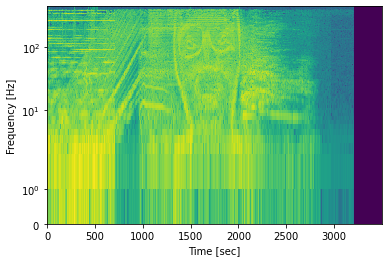

In [4]:
# Window weighting
weighting = np.hanning(window_size)[:, None]

# squared Fast Fourier Transform (fft)
fft = np.fft.fft(windows * weighting, axis=0)
fft = fft[:442] # Since it's mirrored take first half
fft = np.absolute(fft) # absolute FFTs of the windowed data
fft = fft**2

# 2D spectrogram matrix which rows and columns represent window frame number 
# and frequency bin, values represent the strength of the frequencies.
spectrogram = 10 * np.log(fft + 1e-14) # 10 ∗ log10(x + c) to smooth the data for a better representation

plt.pcolormesh(spectrogram) # for obtaining a visual from the data
plt.ylabel('Frequency [Hz]')
plt.yscale('symlog') # The artist hid the face into log scale. Thus, ’y scale’ selected as ’symlog’.
plt.xlabel('Time [sec]')
plt.show()